# Random Forest Model For Predicting First Day IPO Performance

[Text describing the overview of this notebook]

To begin, we will import the necessary modules and libraries

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

We read the ipo data from a csv to a pandas data frame.

Next, we convert the labels of the dataset to be numeric so that it can be processed in our random forest model. We store the labels of the features we choose to use in `ipo_features`. Then we normalize these features of each ipo by converting it to a float32 data type.



In [65]:
ipos = pd.read_csv("../data/scoop_ipos.csv")
# get labels
ipos["Underpriced"] = ipos["Underpriced"].astype(int)
ipo_labels = ipos["Underpriced"].tolist()
# get features
ipos = ipos.select_dtypes(['float64', 'float32', int])
ipo_features = ipos._get_numeric_data().columns.values.tolist()[1:-1]
print("Possible Features:", ipo_features)
# convert data types of all possible feature columns
for ipo_feature in ipo_features :
    ipos[ipo_feature] = ipos[ipo_feature].astype('float32').notnull()

Possible Features: ['Offer Price', 'Opening Price', '1st Day Close', '1st Day Percent Change', 'Change Opening', 'Change Close', 'Year']


The features we have chose to use are stored in `ipo_features_data` as a pandas dataframe. Using this data frame long with the labels, we make a test and training split. 

We then use `sci-kit learn`'s Random Forest model to initialize a classification model. This model is trained on the designated training data we have created. We then make a prediction by feeding the newly created model the test set we created.

Random forest is an ensemble machine learning algorithm that uses multiple decision trees to make predictions. It works by randomly selecting a subset of features from the dataset and then building a decision tree for each subset. This is process is called bagging. Each tree is then used to make a prediction, and the final prediction is made by taking the average of all the individual tree predictions. Bagging along with with the other processes helps reduce overfitting and improves accuracy. Random forest also has the ability to handle large datasets with high dimensionality, making it a powerful tool for predictive analytics.

In [6]:
# get columns for specified features
ipo_features = ipo_features[:-1]
ipo_features_data = ipos[['Offer Price', 'Opening Price']]
# split dataset to trianing set and test set
ipo_features_data_train, ipo_features_data_test, ipo_labels_train, ipo_labels_test = train_test_split(ipo_features_data, ipo_labels, test_size=0.3)
# create classifier 
clf = RandomForestClassifier(n_estimators=100)
# train the model
clf.fit(ipo_features_data_train, ipo_labels_train)
# predict
ipo_labels_pred = clf.predict(ipo_features_data_test)
# TODO save trained models

In [7]:
# check accuracy
print("Accuracy:", metrics.accuracy_score(ipo_labels_test, ipo_labels_pred))

Accuracy: 0.76981852913085


We now analyze the importance of each feature.

In [8]:
# find feature importance
feature_imp = pd.Series(clf.feature_importances_,index=['Offer Price', 'Opening Price']).sort_values(ascending=False)
feature_imp

Opening Price    0.550562
Offer Price      0.449438
dtype: float64

No handles with labels found to put in legend.


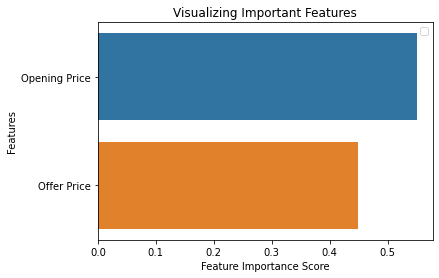

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [60]:
estimator = clf.estimators_[10]

In [61]:
export_graphviz(estimator, out_file='small_tree.dot', 
                feature_names = ['Offer Price', 'Opening Price'],
                #class_names = clf.target_names,
                rounded = True, proportion = False, 
                precision = 1, filled = True)

In [62]:
call(['dot', '-Tpng', 'small_tree.dot', '-o', 'small_tree.png', '-Gdpi=600'])

0

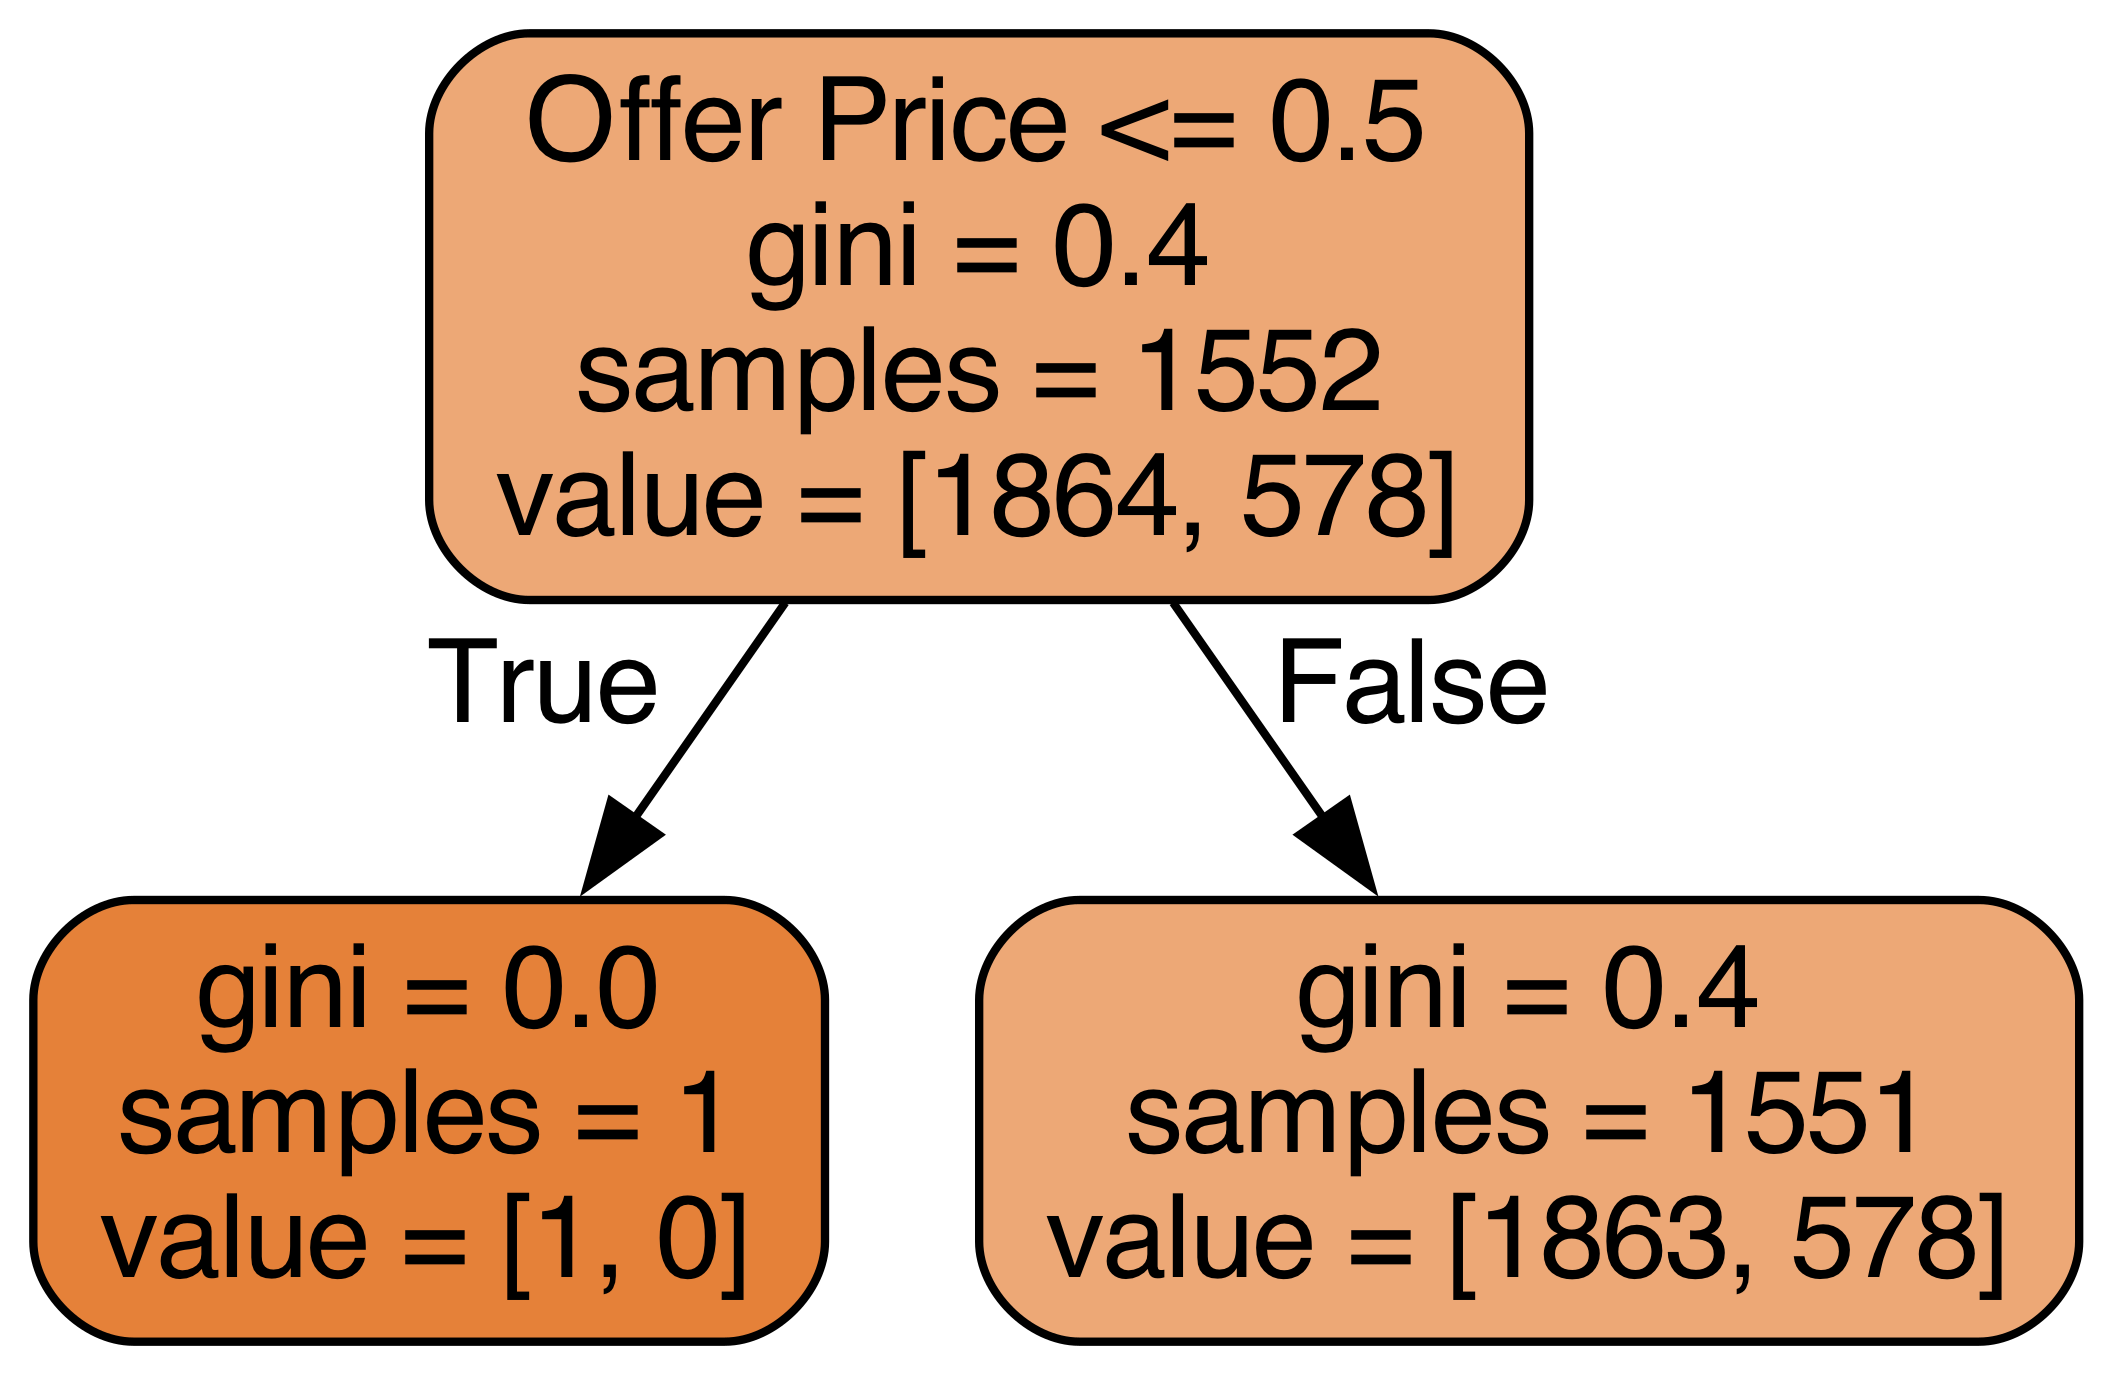

In [63]:
Image(filename = 'small_tree.png')